In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

## Rank Swapping
For the implimentation of Rank Swapping please see `rank_swapping.py`

In [5]:
from rank_swapping import rank_swapping
from models import models
from sklearn.model_selection import train_test_split
from preprocessing import preprocess

results = []

for p in [0, 2, 5, 10]:
    data = "./data/data_for_student_case.csv"
    df1 = pd.read_csv(data)

    #rankswap
    swap_cols = ['txid', 'bookingdate', 'issuercountrycode', 'txvariantcode', 'bin',
       'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction',
       'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode',
       'creationdate', 'accountcode', 'mail_id', 'ip_id', 'card_id']
    df1 = rank_swapping(df1, p, swap_cols)

    #preprocess
    df1 = preprocess(df1, undersample=True)

    x_columns = ['txid', 'issuercountrycode', 'txvariantcode', 'bin', 'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode', 'mail_id', 'ip_id', 'card_id', 'amount_eur', 'accountcode_cc', 'countries_equal', 'day_of_week', 'hour']
    X = df1[x_columns].to_numpy(dtype=np.float)
    Y = df1['simple_journal'].to_numpy(dtype=np.int)

    print(np.argwhere(np.isnan(X)))
    nans = ~np.isnan(X).any(axis=1)
    X = X[nans] # remove NaN
    Y = Y[nans] # remove NaN
    print( np.shape(X))

    #build and evaluate model
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    result = models.try_all(X_train, X_test, Y_train, Y_test)
    result['p'] = p
    results.append(result)


RankSwapping with p = 0
Not Swapping :)
[]
(24014, 19)
RankSwapping with p = 2
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[]
(24014, 19)
RankSwapping with p = 5
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[]
(24014, 19)
RankSwapping with p = 10
swapped 5%
swapped 11%
swapped 17%
swapped 23%
swapped 29%
swapped 35%
swapped 41%
swapped 47%
swapped 52%
swapped 58%
swapped 64%
swapped 70%
swapped 76%
swapped 82%
swapped 88%
swapped 94%
swapped 100%
[]
(24014, 19)


### Model AUC Plots for observing Rank Swapping effects.

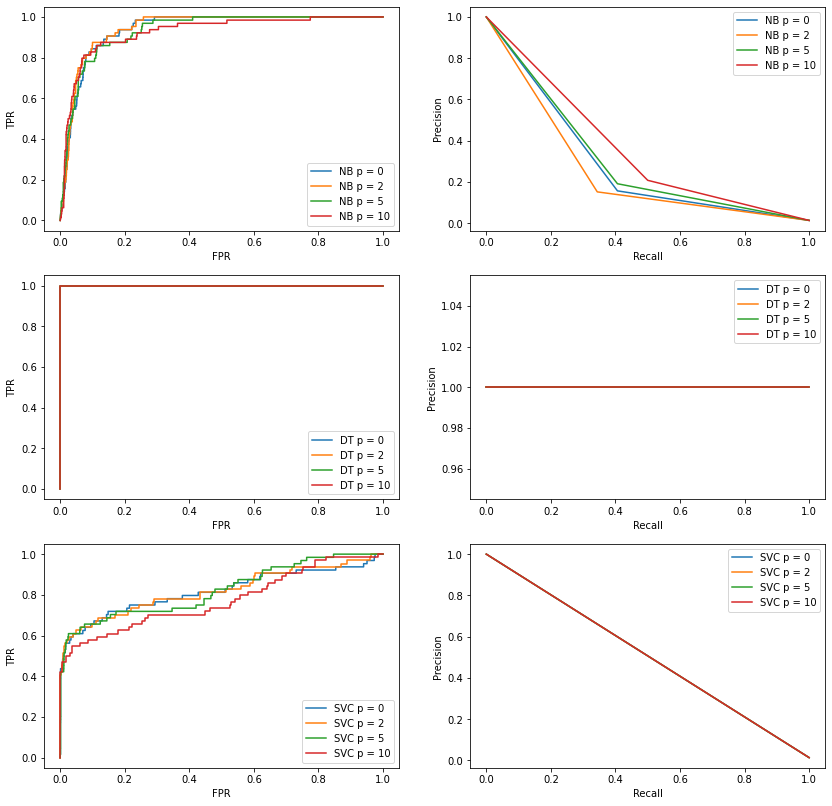

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(14,14)

for i in range(3):
    axs[i,0].set_xlabel("FPR")
    axs[i,0].set_ylabel("TPR")

    axs[i,1].set_xlabel("Recall")
    axs[i,1].set_ylabel("Precision")

#print("p  accuracy  precision  recall  F1 ")
#print('------------------------------------------')
for result in results:
    p = result['p']
    result_ = result['NaiveBayes']
    #print(str(p) + "\t"+ str(result_['accuracy']) + "\t" +str(result_['precision']) + "\t" +str(result_['recall']) + "\t" +str(result_['f1']))

    axs[0,0].plot(result_['false_pos_rate'], result_['true_pos_rate'], label="NB p = "+str(p))
    axs[0,1].plot(result_['recall_curve'], result_['precision_curve'], label="NB p = "+str(p))

    result_ = result['DecisionTree']
    #print(str(p) + "\t"+ str(result_['accuracy']) + "\t" +str(result_['precision']) + "\t" +str(result_['recall']) + "\t" +str(result_['f1']))

    axs[1,0].plot(result_['false_pos_rate'], result_['true_pos_rate'], label="DT p = "+str(p))
    axs[1,1].plot(result_['recall_curve'], result_['precision_curve'], label="DT p = "+str(p))

    result_ = result['SVC']
    #print(str(p) + "\t"+ str(result_['accuracy']) + "\t" +str(result_['precision']) + "\t" +str(result_['recall']) + "\t" +str(result_['f1']))

    axs[2,0].plot(result_['false_pos_rate'], result_['true_pos_rate'], label="SVC p = "+str(p))
    axs[2,1].plot(result_['recall_curve'], result_['precision_curve'], label="SVC p = "+str(p))

for i in range(3):
    axs[i,0].legend()
    axs[i,1].legend()
plt.show()

The plots show that Rank Swapping has the following effect on the models:
*   **Naive Bayes**: ROC characteristics mostly unchanged but Precision-Recall curve sees major changes woth p=10 (more swapping) leading to greater generalization
*   **Decision Tree**: No change
*   **Support Vector Machine**: minor changes in the ROC but no change in the Precision-Recall curve.

To answer the Rank Swapping question, with the intention of preserving users' privacy, rank-swapping does not come at a great cost of performance of the models. Thus, it is advisable to protect people's privacy using rank-swapping.